Loading and preprocessing training data...
Loading and preprocessing validation data...
Loading and preprocessing test data...
Training data shape: (3584, 83), Labels shape: (3584, 4)
Validation data shape: (768, 83), Labels shape: (768, 4)
Test data shape: (768, 83), Labels shape: (768, 4)
Number of classes: 4


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 83)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2656)           │       223,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 83, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ add (Add)                       │ (None, 83, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 83, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block               │ (None, 83, 32)         │        19,040 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ transformer_block_1             │ (None, 83, 32)         │        19,040 │
│ (TransformerBlock)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d        │ (None, 32)             │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 263,556 (1.01 MB)

 Trainable params: 263,556 (1.01 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 23s 251ms/step - accuracy: 0.2649 - loss: 1.4342 - val_accuracy: 0.4036 - val_loss: 1.3300
Epoch 2/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.3768 - loss: 1.3242 - val_accuracy: 0.4635 - val_loss: 1.2376
Epoch 3/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 229ms/step - accuracy: 0.4615 - loss: 1.2367 - val_accuracy: 0.5820 - val_loss: 1.0818
Epoch 4/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 231ms/step - accuracy: 0.5552 - loss: 1.0750 - val_accuracy: 0.6068 - val_loss: 0.9010
Epoch 5/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 13s 240ms/step - accuracy: 0.6235 - loss: 0.9008 - val_accuracy: 0.6862 - val_loss: 0.7629
Epoch 6/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 20s 227ms/step - accuracy: 0.7034 - loss: 0.7598 - val_accuracy: 0.7214 - val_loss: 0.6755
Epoch 7/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 21s 227ms/step - accuracy: 0.7162 - loss: 0.6869 - val_accuracy: 0.7500 - val_loss: 0.6166
Epoch 8/100
56/56 ━━━━━━━━━━━━━━━━━━━━ 12s 218ms/step - accuracy: 0.7661 - loss: 0.6092 - 

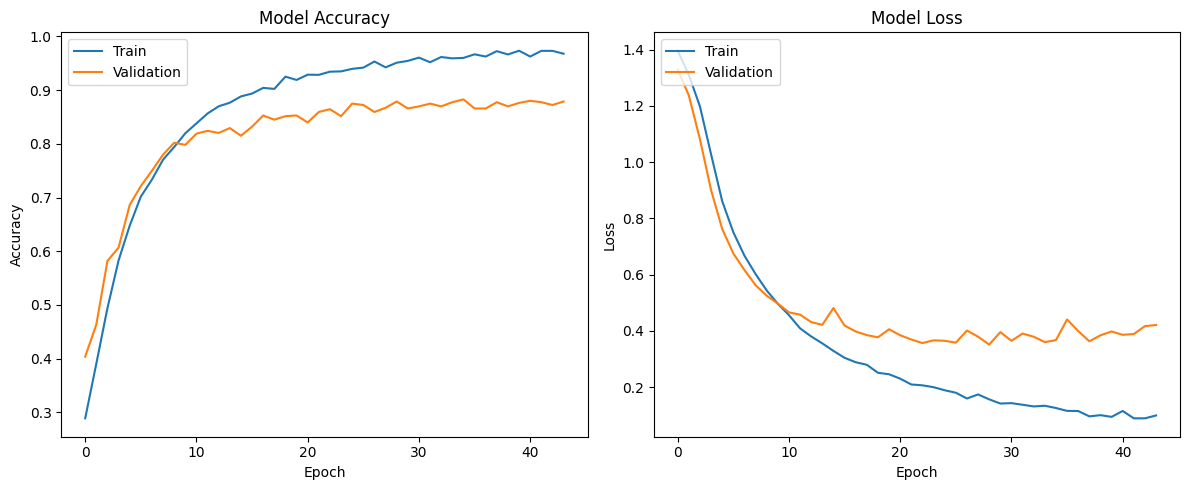

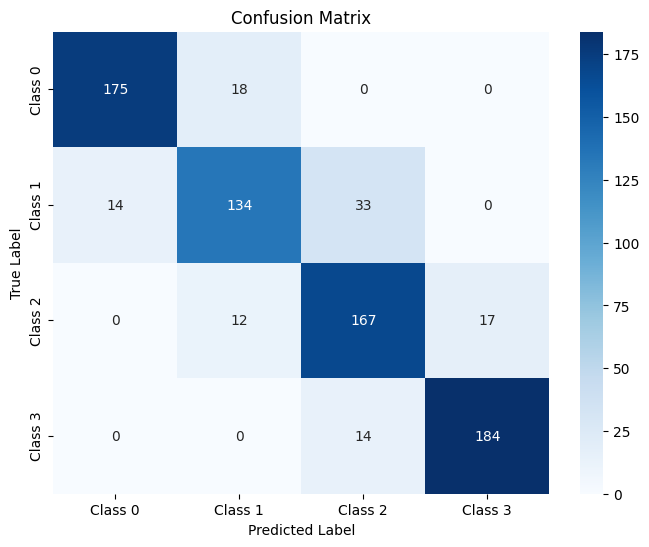


--- End of Script ---


In [ ]:
# -*- coding: utf-8 -*-
# Transformer for Crop Production Classification

# This script demonstrates how to build and train a Transformer model
# for classifying crop production levels based on tabular data using TensorFlow/Keras.

## 1. Setup and Imports

# Import necessary libraries.
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, f1_score # Added f1_score
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive (optional, if data is stored there)
# from google.colab import drive
# drive.mount("/content/drive")

# Define file paths (adjust if using Google Drive or local upload)
# Example for uploaded files in Colab:
TRAIN_PATH = "train.csv"
VALID_PATH = "validation.csv"
TEST_PATH = "test.csv"

# Example for Google Drive:
# DRIVE_PATH = "/content/drive/MyDrive/your_folder/"
# TRAIN_PATH = DRIVE_PATH + "train.csv"
# VALID_PATH = DRIVE_PATH + "validation.csv"
# TEST_PATH = DRIVE_PATH + "test.csv"

## 2. Load and Preprocess Data

# Load the datasets and apply preprocessing steps.
def load_and_preprocess(file_path, scaler=None, fit_scaler=False, label_encoder=None, fit_encoder=False):
    """Loads data, preprocesses features, and converts target to classes."""
    df = pd.read_csv(file_path)

    # Define class boundaries based on training data analysis
    bins = [-np.inf, 732.50, 2050.00, 5291.25, np.inf]
    labels = [0, 1, 2, 3] # Low, Medium, High, Very High

    # Convert target variable to classes
    df["Production_Class"] = pd.cut(df["Production (M.Ton)"], bins=bins, labels=labels, right=True)

    # Separate features and target
    X = df.drop(["Production (M.Ton)", "Production_Class"], axis=1)
    y = df["Production_Class"]

    # Identify numerical features (excluding one-hot encoded Crop and District)
    # Assuming columns starting with 'Crop_' or 'District_' are one-hot encoded
    numerical_cols = [col for col in X.columns if not col.startswith("Crop_") and not col.startswith("District_")]

    # Scale numerical features
    if fit_scaler:
        scaler = StandardScaler()
        X[numerical_cols] = scaler.fit_transform(X[numerical_cols])
    else:
        if scaler is None:
            raise ValueError("Scaler must be provided if fit_scaler is False")
        X[numerical_cols] = scaler.transform(X[numerical_cols])

    # Encode labels
    if fit_encoder:
        label_encoder = LabelEncoder()
        y_encoded = label_encoder.fit_transform(y)
    else:
        if label_encoder is None:
            raise ValueError("LabelEncoder must be provided if fit_encoder is False")
        y_encoded = label_encoder.transform(y)

    # Convert labels to one-hot encoding
    y_one_hot = tf.keras.utils.to_categorical(y_encoded, num_classes=len(labels))

    # Return features as a flat numpy array (samples, features)
    X_flat = X.values

    if fit_scaler and fit_encoder:
        return X_flat, y_one_hot, scaler, label_encoder
    elif fit_scaler:
         return X_flat, y_one_hot, scaler
    elif fit_encoder:
        return X_flat, y_one_hot, label_encoder
    else:
        return X_flat, y_one_hot

# Load and preprocess data
print("Loading and preprocessing training data...")
X_train, y_train, scaler, label_encoder = load_and_preprocess(TRAIN_PATH, fit_scaler=True, fit_encoder=True)
print("Loading and preprocessing validation data...")
X_val, y_val = load_and_preprocess(VALID_PATH, scaler=scaler, label_encoder=label_encoder)
print("Loading and preprocessing test data...")
X_test, y_test = load_and_preprocess(TEST_PATH, scaler=scaler, label_encoder=label_encoder)

print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, Labels shape: {y_val.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")
print(f"Number of classes: {y_train.shape[1]}")

## 3. Build the Transformer Model

# Define the Transformer block as a layer
class TransformerBlock(layers.Layer):
    def __init__(self, embed_dim, num_heads, ff_dim, rate=0.1):
        super().__init__()
        self.att = layers.MultiHeadAttention(num_heads=num_heads, key_dim=embed_dim)
        self.ffn = keras.Sequential(
            [layers.Dense(ff_dim, activation="relu"), layers.Dense(embed_dim),]
        )
        self.layernorm1 = layers.LayerNormalization(epsilon=1e-6)
        self.layernorm2 = layers.LayerNormalization(epsilon=1e-6)
        self.dropout1 = layers.Dropout(rate)
        self.dropout2 = layers.Dropout(rate)

    # Corrected call method: pass 'training' argument to sub-layers
    def call(self, inputs, training=None): # Allow training=None for inference
        # Pass training argument to MultiHeadAttention
        attn_output = self.att(inputs, inputs, training=training)
        # Pass training argument to Dropout 1
        attn_output = self.dropout1(attn_output, training=training)
        out1 = self.layernorm1(inputs + attn_output)
        # Pass training argument to the Sequential FFN
        ffn_output = self.ffn(out1, training=training)
        # Pass training argument to Dropout 2
        ffn_output = self.dropout2(ffn_output, training=training)
        return self.layernorm2(out1 + ffn_output)

# Define the Transformer model building function
def build_transformer_model(input_shape, embed_dim, num_heads, ff_dim, num_transformer_blocks, num_classes, dropout_rate=0.1):
    """Builds the Transformer model for tabular data."""
    num_features = input_shape[0]
    inputs = keras.Input(shape=input_shape)

    # --- Feature Embedding and Positional Encoding ---
    # Project features to embedding dimension
    x = layers.Dense(num_features * embed_dim, activation='relu')(inputs) # Project
    x = layers.Reshape((num_features, embed_dim))(x) # Reshape to (batch, seq_len=num_features, embed_dim)

    # Add learnable positional embedding
    position_embedding_layer = layers.Embedding(input_dim=num_features, output_dim=embed_dim)
    positions = tf.range(start=0, limit=num_features, delta=1)
    position_embeddings = position_embedding_layer(positions)
    x = x + position_embeddings
    # Pass training argument to Dropout after embedding
    x = layers.Dropout(dropout_rate)(x) # Keras handles training arg here implicitly in functional API
    # ----------------------------------------------------

    # --- Transformer Blocks ---
    for _ in range(num_transformer_blocks):
        # Keras handles passing the 'training' context implicitly here in functional API
        x = TransformerBlock(embed_dim, num_heads, ff_dim, dropout_rate)(x)
    # -------------------------

    # --- Classifier Head ---
    x = layers.GlobalAveragePooling1D()(x) # Pool across the feature dimension
    # Pass training argument to Dropout layers
    x = layers.Dropout(0.1)(x) # Keras handles training arg here implicitly
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.1)(x) # Keras handles training arg here implicitly
    outputs = layers.Dense(num_classes, activation="softmax")(x)
    # -----------------------

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

# --- Hyperparameters ---
EMBED_DIM = 32  # Embedding dimension for each feature position
NUM_HEADS = 4   # Number of attention heads
FF_DIM = 32     # Hidden layer size in feed forward network inside transformer
NUM_TRANSFORMER_BLOCKS = 2 # Number of transformer blocks
DROPOUT_RATE = 0.1
# -----------------------

# Get input shape and number of classes from preprocessed data
input_shape = (X_train.shape[1],) # Shape is (num_features,)
num_classes = y_train.shape[1]

# Build the model
model = build_transformer_model(
    input_shape,
    embed_dim=EMBED_DIM,
    num_heads=NUM_HEADS,
    ff_dim=FF_DIM,
    num_transformer_blocks=NUM_TRANSFORMER_BLOCKS,
    num_classes=num_classes,
    dropout_rate=DROPOUT_RATE
)

# Compile the model
# Consider using AdamW or a lower learning rate for Transformers
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-4)
model.compile(loss="categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])

# Print model summary
model.summary()

## 4. Train the Model

# Train the Transformer using the training and validation datasets.

# Define training parameters
EPOCHS = 100 # Transformers might need more epochs, adjust as needed
BATCH_SIZE = 64

# Add Early Stopping to prevent overfitting
early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True) # Increased patience

# Train the model
history = model.fit(
    X_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping]
)

## 5. Evaluate the Model

# Get best validation accuracy from history
# Check if 'val_accuracy' exists in history (it should if validation_data is provided)
if 'val_accuracy' in history.history:
    best_val_accuracy = max(history.history['val_accuracy'])
    print(f"\nBest Validation Accuracy: {best_val_accuracy:.4f}")
else:
    print("\nValidation accuracy not available in history.")

# Evaluate the trained model on the test dataset.
print("\nEvaluating model on test data...")
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Generate predictions
print("\nGenerating predictions on test data...")
y_pred_proba = model.predict(X_test)
y_pred = np.argmax(y_pred_proba, axis=1)

# Convert one-hot encoded y_test back to single labels for comparison
y_test_labels = np.argmax(y_test, axis=1)

# Get class names from label encoder
class_names = label_encoder.classes_

# Print Classification Report (includes Recall and F1-score per class, and macro/weighted averages)
print("\nClassification Report (includes Recall and F1-score):")
print(classification_report(y_test_labels, y_pred, target_names=[f"Class {i}" for i in class_names]))

# Calculate and print Macro F1 Score separately
macro_f1 = f1_score(y_test_labels, y_pred, average='macro')
print(f"\nMacro F1 Score (Test Set): {macro_f1:.4f}")

# Print Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_labels, y_pred)
print(cm)

## 6. Visualize Results

# Plot training history and confusion matrix.

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"])
if 'val_accuracy' in history.history: # Check if validation accuracy exists
    plt.plot(history.history["val_accuracy"])
    plt.legend(["Train", "Validation"], loc="upper left")
else:
    plt.legend(["Train"], loc="upper left")
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")


# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"])
if 'val_loss' in history.history: # Check if validation loss exists
    plt.plot(history.history["val_loss"])
    plt.legend(["Train", "Validation"], loc="upper left")
else:
    plt.legend(["Train"], loc="upper left")
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.tight_layout()
plt.show()

# Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[f"Class {i}" for i in class_names], yticklabels=[f"Class {i}" for i in class_names])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

print("\n--- End of Script ---")

